# Lab 6

## Clustering algorithm

In [16]:
# K-means Clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# load the iris datasets
dataset = load_iris()
# fit a Kmeans model to the data
model = KMeans(n_clusters=4)
model.fit(dataset.data)
print(model)

KMeans(n_clusters=4)


In [14]:
dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [8]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [9]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

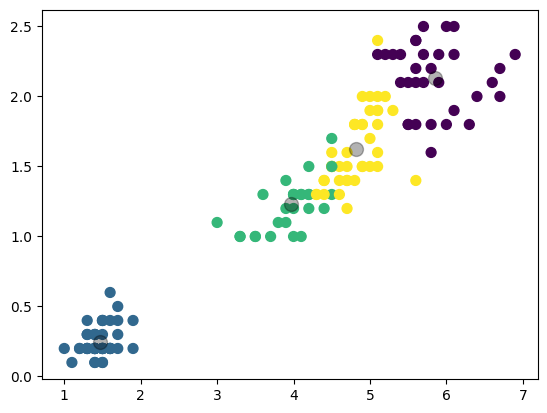

In [17]:
# Visualize the results
import matplotlib.pyplot as plt
X = dataset.data
#y_kmeans = model.predict(X)
y_kmeans = model.labels_
# scatter plot the petal length (column 2), petal width (column 3)
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, s=50, cmap='viridis')
# show centroid centres as grey circle opacity 50%
centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=100, alpha=0.3)


### Best number of clusters using the Silhoutte score

In [18]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
X = load_iris().data
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(
            n_cluster, sil_coeff))



For n_clusters=2, The Silhouette Coefficient is 0.6810461692117462
For n_clusters=3, The Silhouette Coefficient is 0.551191604619592
For n_clusters=4, The Silhouette Coefficient is 0.4974551890173751
For n_clusters=5, The Silhouette Coefficient is 0.48874888709310566
For n_clusters=6, The Silhouette Coefficient is 0.47779700369738437
For n_clusters=7, The Silhouette Coefficient is 0.31571537469549915
For n_clusters=8, The Silhouette Coefficient is 0.42625134135729353
For n_clusters=9, The Silhouette Coefficient is 0.31262829256878616
For n_clusters=10, The Silhouette Coefficient is 0.3168168312796231


Best number with highest Silhouette score is cluster number = ???

### Using Elbow Method instead of the point estimate using Silhouette  score

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Distortion values:
1 : 4.542470666666664
2 : 1.01565301173572
3 : 0.5257044388398484
4 : 0.3823392014196983
5 : 0.3098148677248678
6 : 0.2604402356902358
7 : 0.22870543530543538
8 : 0.2031748196248197
9 : 0.19937497772758653


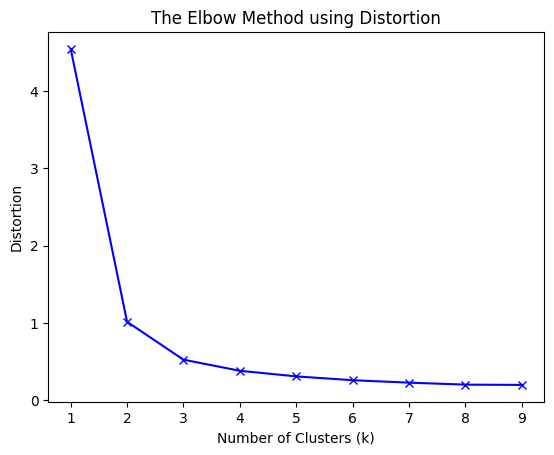

In [22]:
# load the data
X = load_iris().data
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    distortions.append(sum(np.min(cdist(X,
            kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 681.3705999999996
2 : 152.34795176035797
3 : 78.85566582597727
4 : 57.350880212954756
5 : 46.47223015873018
6 : 39.066035353535376
7 : 34.305815295815314
8 : 30.476222943722966
9 : 29.906246659137977


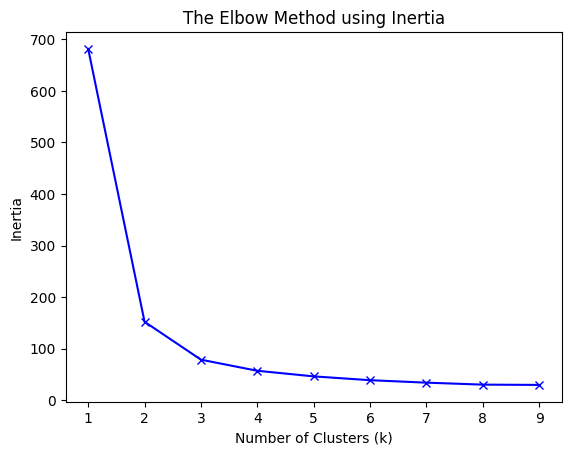

In [23]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Anomaly Detection

KMeans(n_clusters=1)


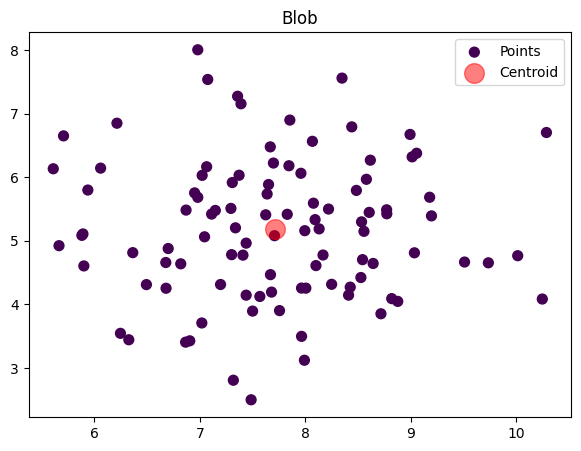

In [24]:
# Anomaly Detection using K-means
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.cluster import KMeans
# generate the data
X, label = make_blobs(100, centers = 1)
# get the K-means model
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)
print(kmeans)

# Visualize the results
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(X)
# scatter plot the data points
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title('Blob')
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis',
           label='Points')
# show centroid centres as red circle opacity 50%
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5,
           label='Centroid')
ax.legend()
plt.show()


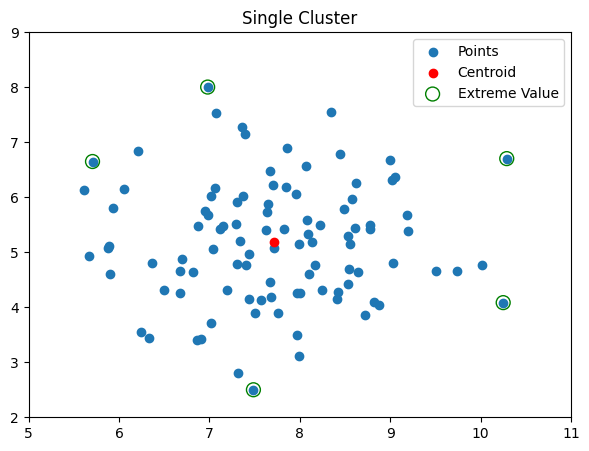

In [34]:

# identify the 5 closest points
# argsort returns an array of indexes which will sort the array in
# ascending order
# so we reverse it via [::-1] and take the top five with [:5]
distances = kmeans.transform(X)
sorted_idx = np.argsort(distances.ravel())[::-1][:5]
# Now let's see which are the top 5 points furthest away
f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(X[:, 0], X[:, 1], label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0],
           centers[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')
ax.set_xlim([5, 11])
ax.set_ylim([2, 9])
plt.show()



In [27]:
# It's easy to remove these points if we like:
new_X = np.delete(X, sorted_idx, axis=0)
# Or to extract the anomalies
anomaly_X = X[sorted_idx,:]
print(anomaly_X)

[[10.28816565  6.70310047]
 [ 6.98038708  8.00403606]
 [10.24896157  4.0844634 ]
 [ 7.48651574  2.5003743 ]
 [ 5.70689723  6.65018718]]


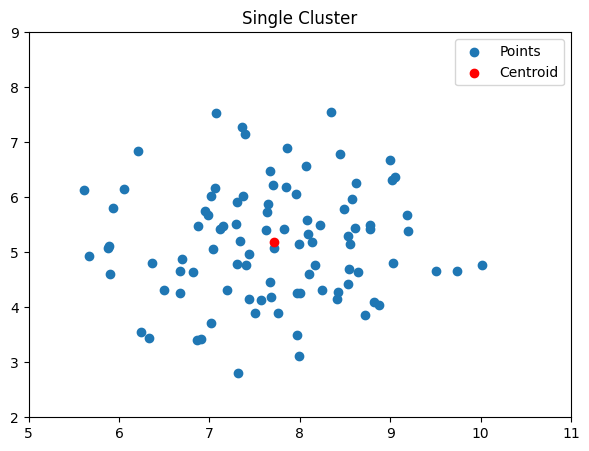

In [35]:
# Try plotting the new_X instead of X
# Convince yourself the anomaly points have been removed

f, ax = plt.subplots(figsize=(7, 5))
ax.set_title("Single Cluster")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Points')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0],
           centers[:, 1],
           label='Centroid', color='r')
ax.legend(loc='best')
# Set x and y limits
ax.set_xlim([5, 11])
ax.set_ylim([2, 9])
plt.show()